<a href="https://colab.research.google.com/github/kripperda/MLA_KMR/blob/main/FinalProject_Classification_KMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Final Assignment


---

Kory Ripperda

Problem 2 - Classification

---

Car Evaluation

Standard Imports

In [43]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # LabelEncoder might be needed for target
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# Configure plots
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries Loaded.")


Libraries Loaded.


Import Dataset from UCI

In [44]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, header=None, names=column_names)

Statistics and Visual Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

--- First 5 Rows of the Data ---
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

--- Summary Statistics ---
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique    

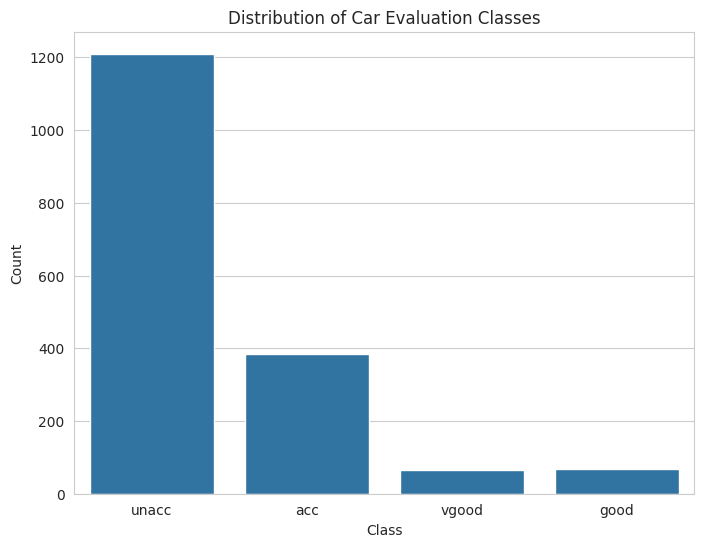

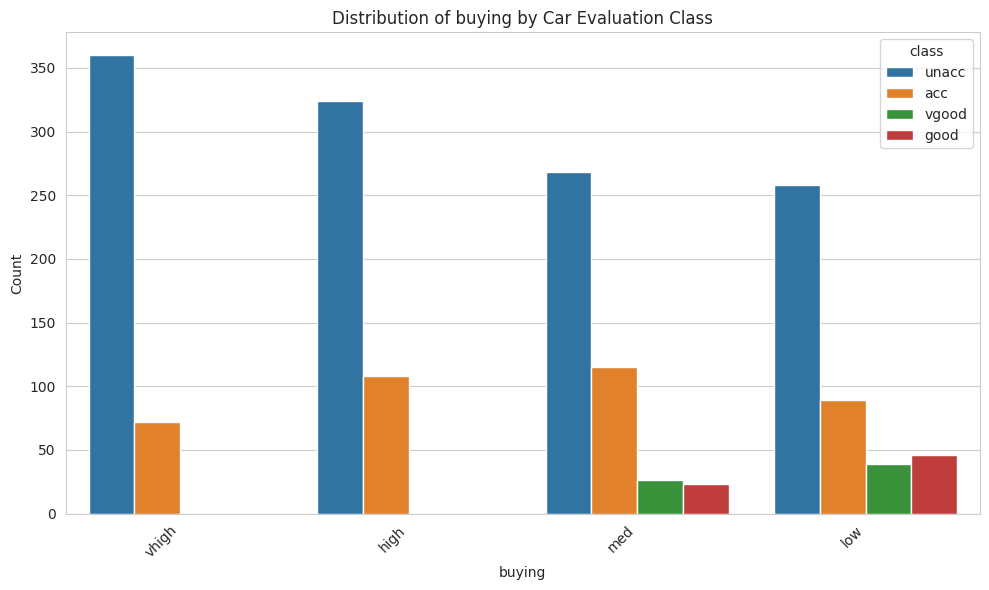

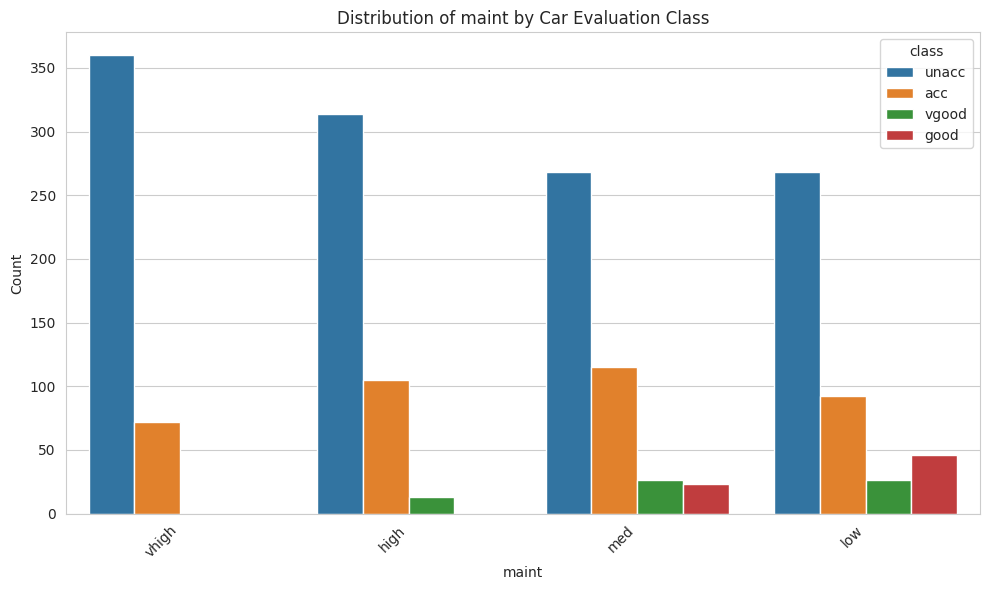

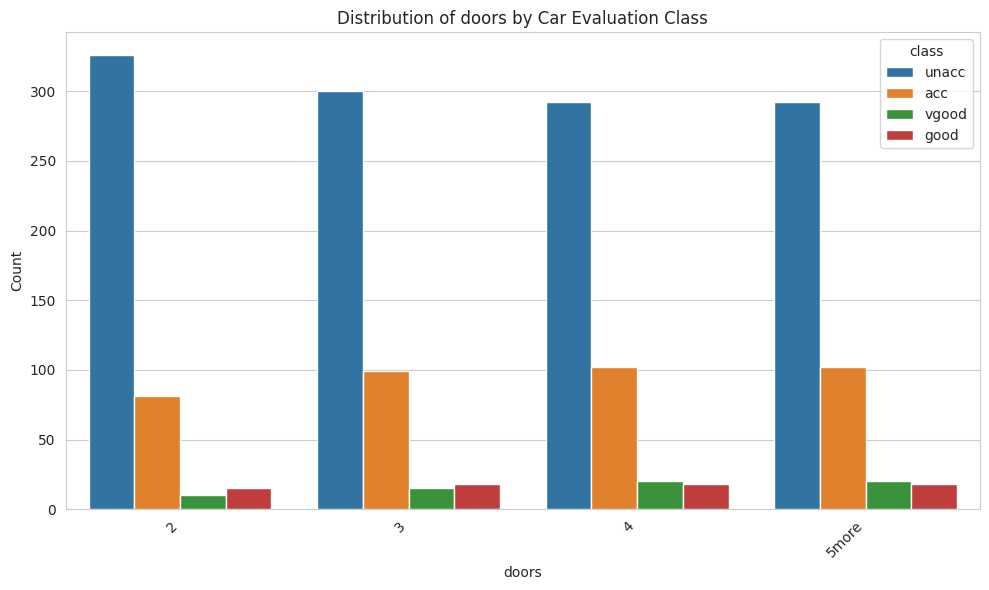

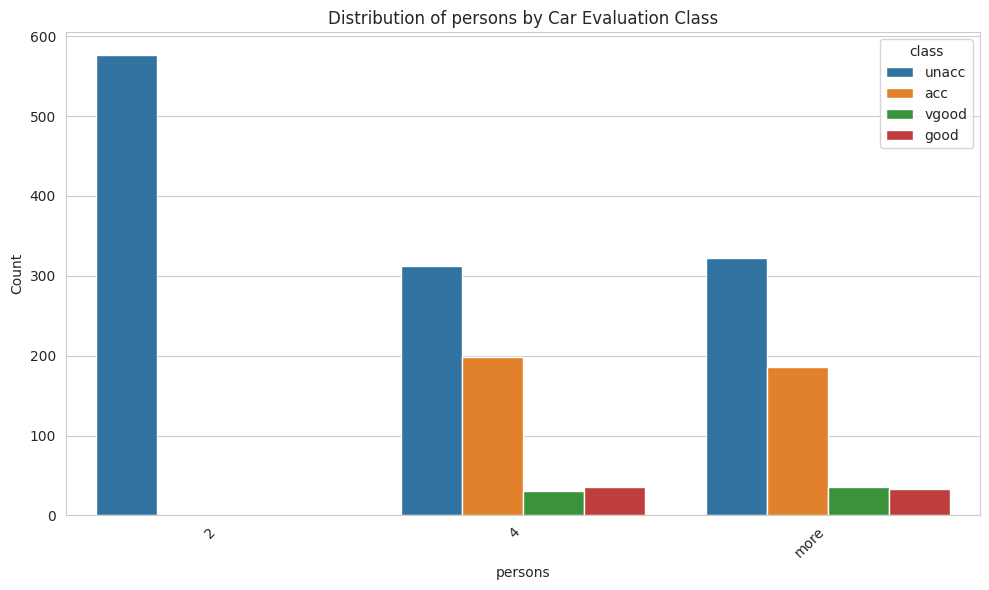

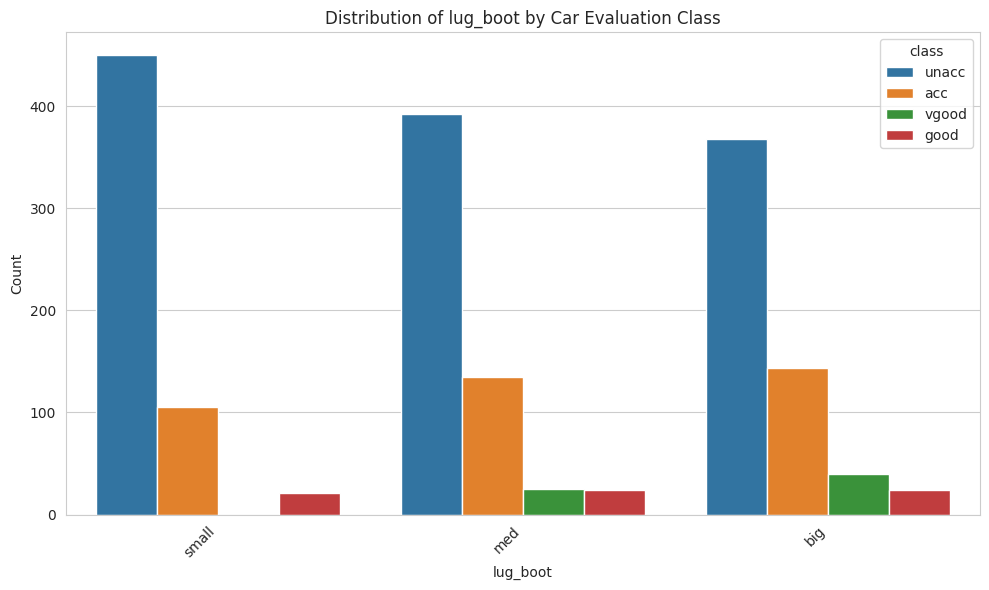

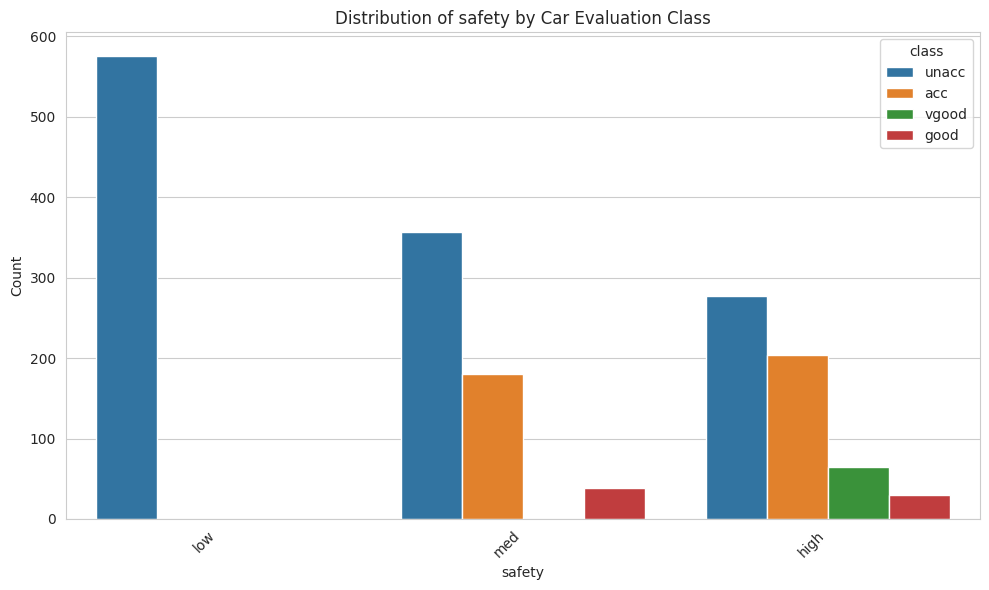

In [45]:
print(df.info())
print("\n--- First 5 Rows of the Data ---")
print(df.head())
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))
print("\n--- Value Counts for Categorical Features ---")
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Car Evaluation Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize other categorical features
categorical_cols = df.select_dtypes(include='object').columns[:-1] # Exclude the target variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'Distribution of {col} by Car Evaluation Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Split Data into Train/Test

In [46]:
# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Build the Pipeline - Logistic Regression

In [47]:
# Identify categorical and numerical features (all are categorical in this dataset)
categorical_features = X.columns

# Create preprocessing pipelines for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression with GridSearchCV
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42, multi_class='auto'))])

param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(multi_class='auto',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

Execute the Model - Logistic Regression

In [48]:
grid_search_lr.fit(X_train, y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(multi_class='auto',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

Evaluate the Model - Logistic Regression

In [49]:
print("\n--- Best Parameters for Logistic Regression ---")
print(grid_search_lr.best_params_)

y_pred_lr = grid_search_lr.predict(X_test)

print("\n--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


--- Best Parameters for Logistic Regression ---
{'classifier__C': 10, 'classifier__penalty': 'l1'}

--- Logistic Regression Performance ---
Accuracy: 0.8978805394990366

Classification Report:
               precision    recall  f1-score   support

         acc       0.78      0.80      0.79       118
        good       0.41      0.37      0.39        19
       unacc       0.96      0.96      0.96       358
       vgood       0.91      0.83      0.87        24

    accuracy                           0.90       519
   macro avg       0.77      0.74      0.75       519
weighted avg       0.90      0.90      0.90       519


Confusion Matrix:
 [[ 94   9  15   0]
 [ 10   7   0   2]
 [ 12   1 345   0]
 [  4   0   0  20]]


Build the Pipeline - Decision Tree

In [50]:
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

Execute the Model - Decision Tree

In [51]:
pipeline_dt.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Evaluate the Model

In [52]:
y_pred_dt = pipeline_dt.predict(X_test)

print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


--- Decision Tree Performance ---
Accuracy: 0.9576107899807321

Classification Report:
               precision    recall  f1-score   support

         acc       0.95      0.89      0.92       118
        good       0.75      0.95      0.84        19
       unacc       0.98      0.99      0.99       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519


Confusion Matrix:
 [[105   4   6   3]
 [  0  18   0   1]
 [  3   0 355   0]
 [  3   2   0  19]]


Contingency Tables

In [53]:
print("\n--- Contingency Table (Logistic Regression) ---")
contingency_lr = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'])
print(contingency_lr)

print("\n--- Contingency Table (Decision Tree) ---")
contingency_dt = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
print(contingency_dt)


--- Contingency Table (Logistic Regression) ---
Predicted  acc  good  unacc  vgood
Actual                            
acc         94     9     15      0
good        10     7      0      2
unacc       12     1    345      0
vgood        4     0      0     20

--- Contingency Table (Decision Tree) ---
Predicted  acc  good  unacc  vgood
Actual                            
acc        105     4      6      3
good         0    18      0      1
unacc        3     0    355      0
vgood        3     2      0     19


Conclusion

The Car Evaluation dataset was analyzed and two classification models, Logistic Regression and Decision Tree, were built and evaluated.
The exploratory data analysis revealed the distribution of different car features and their relationship with the evaluation class.

Logistic Regression achieved an accuracy of 0.8979 on the test set.
The Decision Tree model, optimized using Grid Search, achieved an accuracy of 0.9576 on the test set.

--- Logistic Regression Metrics ---
Precision, Recall, F1-Score (per class):
               precision    recall  f1-score   support

         acc       0.78      0.80      0.79       118
        good       0.41      0.37      0.39        19
       unacc       0.96      0.96      0.96       358
       vgood       0.91      0.83      0.87        24

    accuracy                           0.90       519
   macro avg       0.77      0.74      0.75       519
weighted avg       0.90      0.90      0.90       519

Contingency Table (Confusion Matrix):
        acc  good  unacc  vgood
acc     94     9     15      0
good    10     7      0      2
unacc   12     1    345      0
vgood    4     0      0     20

--- Decision Tree Metrics (with Grid Search) ---
Precision, Recall, F1-Score (per class):
               precision    recall  f1-score   support

         acc       0.95      0.89      0.92       118
        good       0.75      0.95      0.84        19
       unacc       0.98      0.99      0.99       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519


Contingency Table (Confusion Matrix):
        acc  good  unacc  vgood
acc    105     4      6      3
good     0    18      0      1
unacc    3     0    355      0
vgood    3     2      0     19

Based on the results, the Decision Tree model, after hyperparameter tuning using Grid Search, appears to perform better than the Logistic Regression model on this dataset. This suggests that the decision boundaries for car evaluation are likely non-linear, which can be better captured by a tree-based model.